# Training

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from transformer import Transformer

In [2]:
# constants

src_vocab_size = 5000
tgt_vocab_size = 5000
d_embedding = 512
n_head = 8
n_layer = 6
d_ff = 2048
max_seq_length = 100
dropout = 0.1
n_epochs = 50

In [3]:
# Generate random sample data
src_data = torch.randint(1, src_vocab_size, (64, max_seq_length))
tgt_data = torch.randint(1, tgt_vocab_size, (64, max_seq_length))

In [4]:
transformer = Transformer(src_vocab_size, tgt_vocab_size, d_embedding, n_head, d_ff, n_layer, max_seq_length, dropout)

criterion = nn.CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [5]:
transformer.train()

training_loss = []
for epoch in range(n_epochs):
    epoch_loss = 0
    output = transformer(src_data, tgt_data)
    loss = criterion(output.view(-1, tgt_vocab_size), tgt_data.view(-1))
    training_loss.append(loss.item())
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 8.6858
Epoch [2/50], Loss: 8.5294
Epoch [3/50], Loss: 8.4556
Epoch [4/50], Loss: 8.3839
Epoch [5/50], Loss: 8.3086
Epoch [6/50], Loss: 8.1993
Epoch [7/50], Loss: 8.0695
Epoch [8/50], Loss: 7.9515
Epoch [9/50], Loss: 7.8406
Epoch [10/50], Loss: 7.7369
Epoch [11/50], Loss: 7.6691
Epoch [12/50], Loss: 7.6245
Epoch [13/50], Loss: 7.5573
Epoch [14/50], Loss: 7.4792
Epoch [15/50], Loss: 7.4106
Epoch [16/50], Loss: 7.3432
Epoch [17/50], Loss: 7.2588
Epoch [18/50], Loss: 7.1737
Epoch [19/50], Loss: 7.1132
Epoch [20/50], Loss: 7.0672
Epoch [21/50], Loss: 7.0138
Epoch [22/50], Loss: 6.9339
Epoch [23/50], Loss: 6.8396
Epoch [24/50], Loss: 6.7762
Epoch [25/50], Loss: 6.7366
Epoch [26/50], Loss: 6.7046
Epoch [27/50], Loss: 6.6388
Epoch [28/50], Loss: 6.5546
Epoch [29/50], Loss: 6.4782
Epoch [30/50], Loss: 6.4458
Epoch [31/50], Loss: 6.4358
Epoch [32/50], Loss: 6.4445
Epoch [33/50], Loss: 6.4273
Epoch [34/50], Loss: 6.3969
Epoch [35/50], Loss: 6.3513
Epoch [36/50], Loss: 6.3298
E

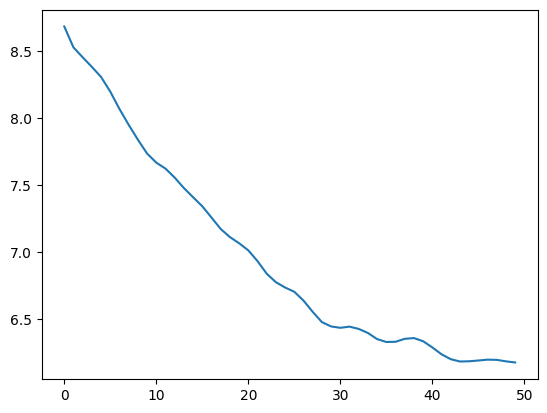

In [6]:
plt.plot(training_loss)